In [1]:
##Packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Reading Train Data
df_train=pd.read_csv('Polynomialdata_train.csv')
arr_train=df_train.to_numpy()
print(f"data_train.shape: {arr_train.shape}")
df_train.describe()

data_train.shape: (50000, 4)


,target,feature 1,feature 2,feature 3
count,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1.773548e+06,0.099964,0.012562,-0.205100
std,1.139467e+07,21.842028,4.000527,56.045907
min,-5.353391e+02,-102.142087,-17.236805,-251.346206
25%,1.366923e+02,-14.424551,-2.708389,-37.961040
50%,1.178718e+04,0.265138,0.026296,-0.278907
75%,2.812790e+05,14.773691,2.698501,37.528504
max,8.392773e+08,92.676100,17.647059,232.683184


In [3]:
## Reading test data
df_test=pd.read_csv('Polynomialdata_test.csv')
arr_test=df_test.to_numpy()
print(f"data_train.shape: {arr_test.shape}")
df_test.describe()

data_train.shape: (10000, 4)


,ID,feature 1,feature 2,feature 3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15036.703500,-0.060363,-0.028461,0.496385
std,2885.190645,22.076114,4.049632,56.022994
min,10000.000000,-93.009054,-15.162144,-185.777377
25%,12545.750000,-15.203528,-2.771030,-36.467849
50%,15040.000000,-0.098698,-0.046567,-0.205485
75%,17553.000000,15.032890,2.699627,38.960722
max,19997.000000,86.921606,15.746176,228.334371


In [4]:
## Forming Input and Output labels of training set
x_train=arr_train[:,1:]
print(x_train.shape)
print(x_train)

y_train=arr_train[:,0]
print(y_train.shape)
print(y_train)

(50000, 3)
[[  5.22184894   7.29511056  95.71684555]
 [ -5.10628445   4.22008546  -6.17236   ]
 [ -4.21805344  -7.57382297 -39.49388399]
 ...
 [ 29.85789417   1.42297302  75.62050543]
 [ 10.79314567   1.21597176  34.43776063]
 [ 12.17170222  -0.79875632  60.24598982]]
(50000,)
[4.13152828e+06 3.17297454e-01 4.67642163e+04 ... 3.83560105e+06
 2.58031768e+04 3.46817108e+05]


In [5]:
## Forming Input and Output labels of test set
x_test=arr_test[:,1:4]
print(x_test.shape)
print(x_test)

y_test=arr_test[:,0]
print(y_test.shape)
print(y_test)

(10000, 3)
[[ 36.24764264  -2.37270368  43.83594722]
 [  5.90377936   5.46008554 -96.14941417]
 [-37.29815674   6.869786   -14.08448749]
 ...
 [ 47.09519214  -1.97746088  39.04490212]
 [ -1.80817812  -0.69378162  57.91862776]
 [ 19.95803371   2.29451622 -16.08254613]]
(10000,)
[16588. 17513. 14448. ... 17741. 18381. 12054.]


In [6]:
## Z-score Normalisation of data
def feature_scale_zNormal(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_normal=(x-mean)/std
    return x_normal
x_train= feature_scale_zNormal(x_train) 
print(x_train.shape)
print(x_train)

(50000, 3)
[[ 0.23449913  1.82041534  1.71150597]
 [-0.23836156  1.05175271 -0.106472  ]
 [-0.19769502 -1.89636525 -0.70101777]
 ...
 [ 1.3624297   0.35255978  1.35293311]
 [ 0.48957399  0.30081577  0.61812198]
 [ 0.55268949 -0.2028049   1.07861032]]


In [7]:
##Feature Adding so as to create the polyno,ial 
def power_function(x,k):
    m,n=x.shape
    if n==0 or k==0 : 
        return np.ones((m,1))
    x_new=np.copy(x)
    for i in range(k+1):
        x_new=np.append(x_new,(x[:,0:1]**i)*power_function(x[:,1:],k-i),axis=1)
    return x_new[:,n:]    
x_train=power_function(x_train,5)
print(x_train.shape)
print(x_train)

(50000, 56)
[[ 1.00000000e+00  1.71150597e+00  2.92925267e+00 ...  5.17539330e-03
   5.50472248e-03  7.09097864e-04]
 [ 1.00000000e+00 -1.06472000e-01  1.13362867e-02 ... -3.43700613e-04
   3.39514663e-03 -7.69451268e-04]
 [ 1.00000000e+00 -7.01017772e-01  4.91425917e-01 ... -1.07080873e-03
  -2.89670897e-03 -3.01980287e-04]
 ...
 [ 1.00000000e+00  1.35293311e+00  1.83042800e+00 ...  4.66157566e+00
   1.21475635e+00  4.69429649e+00]
 [ 1.00000000e+00  6.18121976e-01  3.82074777e-01 ...  3.55097445e-02
   1.72812025e-02  2.81249464e-02]
 [ 1.00000000e+00  1.07861032e+00  1.16340023e+00 ...  1.00644346e-01
  -1.89235779e-02  5.15710546e-02]]


In [8]:
def cost(x,y,w,b):
    s=x.shape
    m=s[0] # number of training examples(rows)
    cost=0
    for i in range(m):
        y_predicted=np.dot(x[i],w)+b
        cost+=(y[i]-y_predicted)**2
    cost=cost/(2*m)
    return cost

In [9]:
## Checking cost for a specific case
w_in=np.zeros(56)
b_in=0
z=cost(x_train,y_train,w_in,b_in)
print(z)

66490664333887.2


In [10]:
# calculating value of the gradient
def gradient(x,y,w,b):
    m=x.shape[0]  #number of traing examples(rows)
    n=x.shape[1]  #number of columns(features)
    dJ_dw=np.zeros(n)
    dJ_db=np.zeros(1)
    y_predicted=(np.matmul(w,x.T)).T+b
    dJ_dw=np.matmul((y_predicted-y),x)
    dJ_db=np.sum(y_predicted-y)
    dJ_dw/=m
    dJ_db/=m
    return dJ_dw,dJ_db

In [11]:
# gradient decent calculation for w and b
def gradient_decent(x,y,w,b,alpha,iterations_n):
    w_new=w
    b_new=b
    for i in range(iterations_n):
        dj_dw,dj_db=gradient(x,y,w_new,b_new)
        w_new=w_new-(alpha)*dj_dw
        b_new= b_new-(alpha)*dj_db
       
    return w_new,b_new

In [12]:
# variation in cost with iterations
def costploting(x,y,w,b,alpha,iterations_n):
    n=math.floor(iterations_n/10)
    totalcost=np.zeros(n)
    m=np.arange(n)
    for i in range(n):
        totalcost[i]=cost(x,y,w,b)
        w,b=gradient_decent(x,y,w,b,alpha,iterations_n)
        print(totalcost[i])
    print(totalcost[n-1])
    plt.title('COST VS NO.OF ITERATIONS')
    plt.ylabel('COST')
    plt.xlabel('NO.OF ITERATIONS')
    plt.plot(m,totalcost)
    return w,b

In [13]:
# measuring accuracy
def R2score(y_predicted,y_actual):
    y_actual_mean=np.mean(y_actual)
    a1=np.sum((y_predicted-y_actual)**2)
    a2=np.sum((y_actual-y_actual_mean)**2)
    accuracy=(1-(a1/a2))*100
    return accuracy

66490664333887.2
5846454709110.084
4739166152205.903
4171809090094.789
3857054018194.727
3671819051246.123
3557506992040.3906
3484394678048.8726
3436413368004.5127
3404346138285.2124
3382634560873.9263
3367792608345.059
3357569904554.2803
3350483588222.6104
3345542382033.5063
3342076875658.8384
3339631687242.7544
3337895301456.875
3336653650672.7896
3335759043759.8936
3335109197269.395
3334633001483.9814
3334280816363.5244
3334017833425.505
3333819522093.508
3333668498024.8613
3333552364072.5664
3333462218027.6226
3333391618401.226
3333335865480.5537
3333291499836.4937
3333255951146.416
3333227291179.893
3333204059167.162
3333185137629.4565
3333169663517.2847
3333156964159.273
3333146510730.712
3333137884160.1147
3333130749923.6763
3333124839233.0273
3333119934858.268
3333115860339.792
3333112471698.6904
3333109651008.265
3333107301363.109
3333105342910.3975
3333103709693.9175
3333102347127.5596
3333101209959.897
3333100260625.806
3333099467904.3374
3333098805821.9995
3333098252753.512

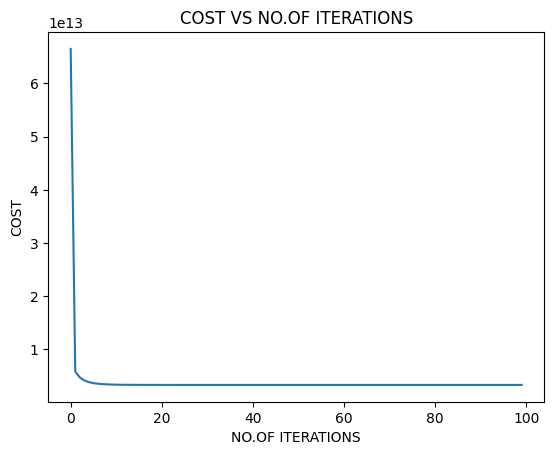

In [14]:
w_in=np.zeros(56)
b_in=0
w_new1,b_new1=costploting(x_train,y_train,w_in,b_in,0.001,1000)
y_pred=(np.matmul(w_new1,x_train.T)).T+b_new1
print(R2score(y_pred,y_train))

3849390091577.884
3056066709778.2695
3025492626315.236
3009061750001.8506
2999659201553.167
2994047715634.2124
2990576826704.917
2988362447434.0874
2986910644439.488
2985935201502.756
2985264954795.019
2984794712319.2817
2984458267946.788
2984213065436.8057
2984031226461.5957
2983894166683.335
2983789292385.1704
2983707933845.328
2983644030106.8022
2983593279101.632
2983552580864.8745
2983519668095.7715
2983492858059.797
2983470884019.542
2983452779364.1846
2983437797021.942
2983425352733.981
2983414984628.282
2983406324041.4175
2983399074184.834
2983392994341.7803
2983387888008.656
2983383593882.7773
2983379978929.6904
2983376932989.019
2983374364532.3486
2983372197294.6396
2983370367576.309
2983368822065.034
2983367516066.0386
2983366412055.1846
2983365478489.953
2983364688828.6943
2983364020717.947
2983363455317.4194
2983362976737.294
2983362571568.9287
2983362228491.642
2983361937943.5728
2983361691845.3657
2983361483367.961
2983361306737.555
2983361157071.006
2983361030237.6006
29

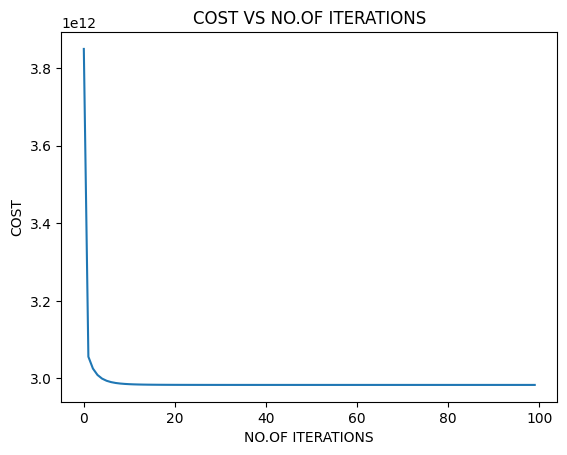

In [15]:
x_cv=x_train[40000:50000,]
y_cv=y_train[40000:50000]
w_new1,b_new1=costploting(x_cv,y_cv,w_new1,b_new1,0.001,1000)
y_predcv=(np.matmul(w_new1,x_cv.T)).T+b_new1
print(R2score(y_predcv,y_cv))

In [16]:
print(R2score(y_predcv,y_cv))

96.50524001287913


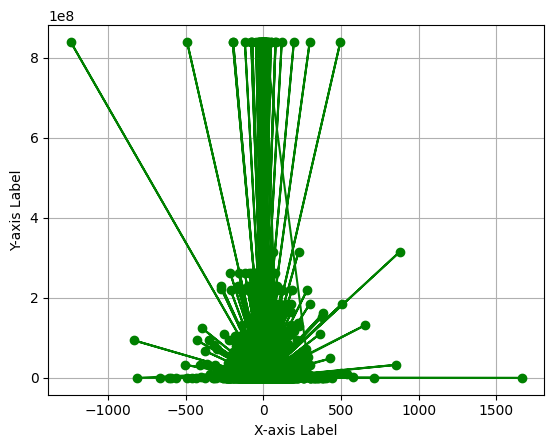

In [17]:
plt.plot(x_cv, y_cv, marker='o', color='g')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

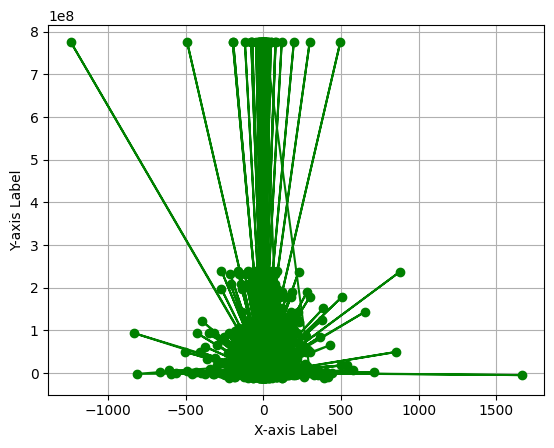

In [18]:
plt.plot(x_cv, y_predcv, marker='o', color='g')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

In [19]:
x_test=feature_scale_zNormal(x_test) 
x_test=power_function(x_test,5)
print(x_test.shape)
print(x_test)

(10000, 56)
[[ 1.00000000e+00  7.73641787e-01  5.98521614e-01 ...  5.66168658e+00
  -4.23657170e+00  1.20366985e+01]
 [ 1.00000000e+00 -1.72519578e+00  2.97630047e+00 ... -9.19235250e-03
   7.22190533e-03  1.43957851e-03]
 [ 1.00000000e+00 -2.60278879e-01  6.77450948e-02 ... -2.10751679e+00
   1.37935803e+01 -1.36588817e+01]
 ...
 [ 1.00000000e+00  6.88118248e-01  4.73506723e-01 ...  1.43281742e+01
  -1.00217985e+01  4.44794822e+01]
 [ 1.00000000e+00  1.02502758e+00  1.05068154e+00 ...  4.02822812e-05
  -6.45677199e-06 -3.11152383e-06]
 [ 1.00000000e+00 -2.95945637e-01  8.75838198e-02 ... -2.00136098e-01
   3.87940054e-01  6.13256073e-01]]


In [20]:
y_pred=(np.matmul(w_new1,x_test.T)).T+b_new1
csv_file_path = 'Polynomial_Predicted.csv'
np.savetxt(csv_file_path, y_pred, delimiter=',')
print(f"Array has been saved to {csv_file_path}")

Array has been saved to Polynomial_Predicted.csv
